## Introdução
***

Depois de ter entendido os conceitos básicos de processamento de imagens e suas bibliotecas, agora vamos aprofundar e estudar kernels, convolução, filtros e recursos básicos de imagens.

Filtros são usados para melhorar uma imagem, principalmente para caso vc queira extrair atributos ou manipular ela.

Vamos fazer uma revisão sem utilizar biblioteca do open cv para detectar contornos em imagens.

***

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

def show(img, color=True):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    if color:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.rcParams['figure.figsize'] = (50, 50)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Esta imagem é um objeto:  <class 'numpy.ndarray'> com as seguintes dimensões: (413, 625)


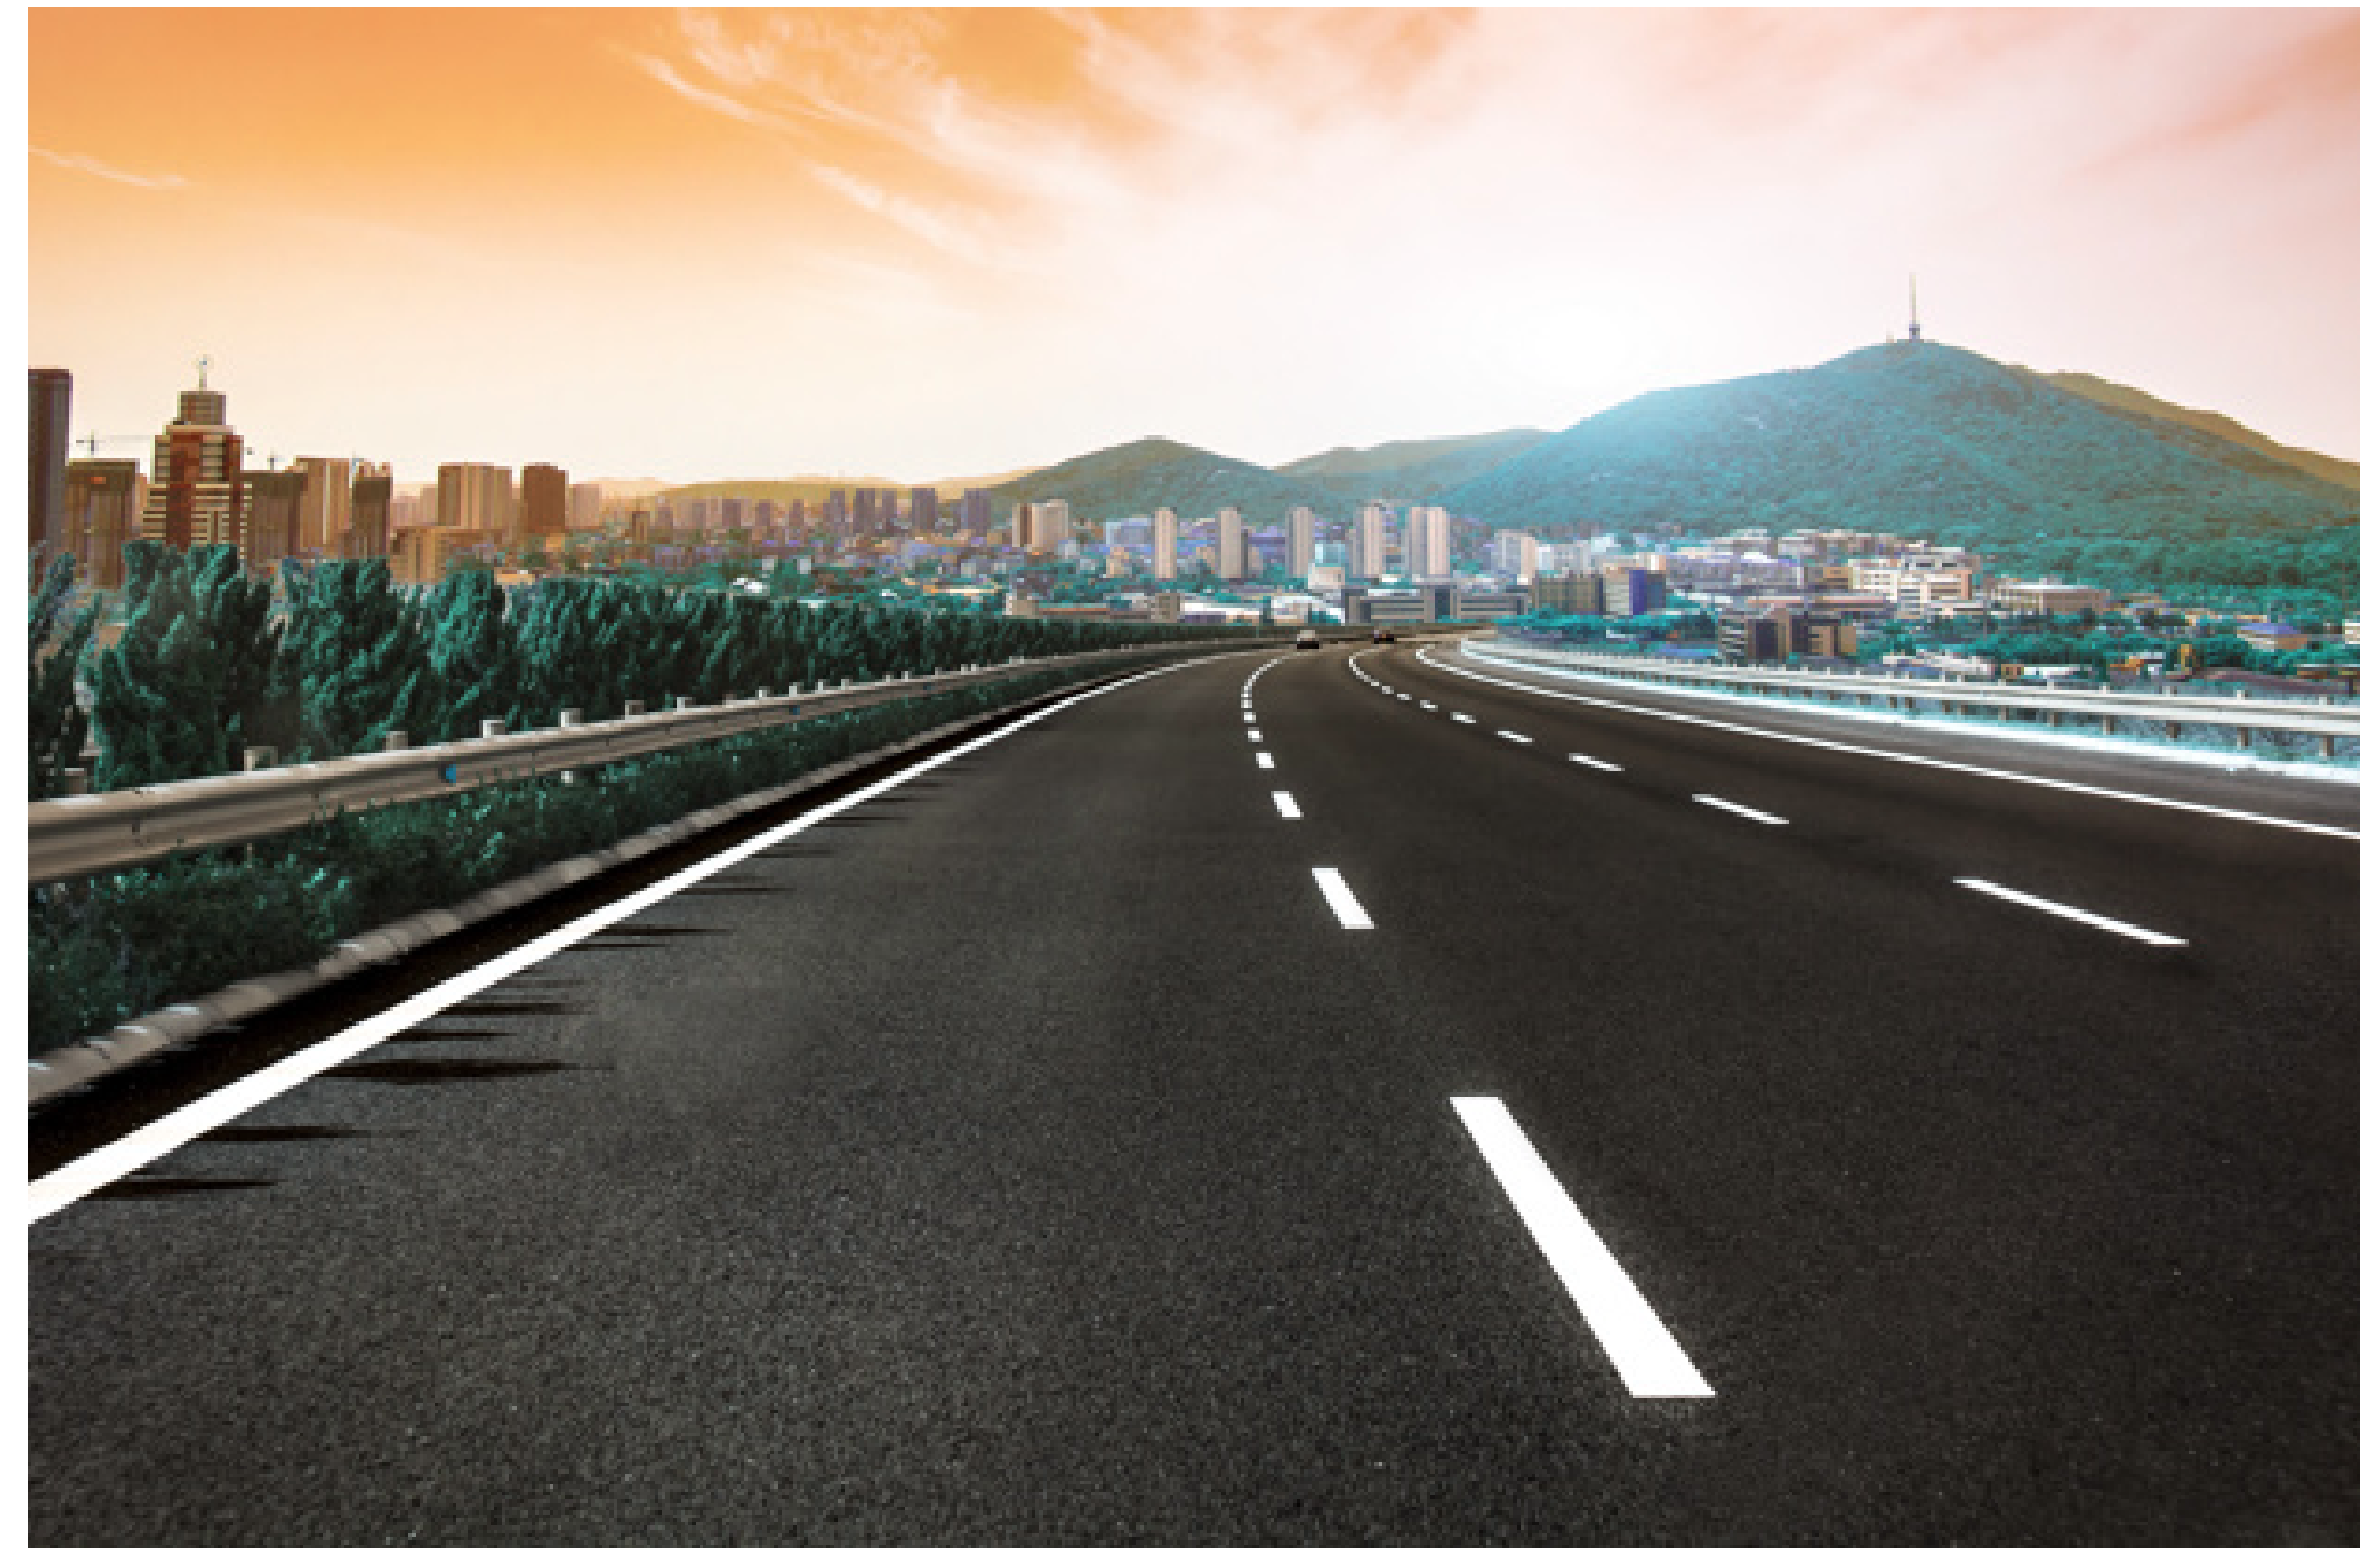

In [2]:
# Leitura da imagem e print de algumas estatísticas
image = mpimg.imread('imagens/estrada.jpg')
print('Esta imagem é um objeto: ',type(image), 'com as seguintes dimensões:', image.shape[0:2])
show(image)

In [3]:
# Obtém o tamanho de x e y e faz uma cópia da imagem
xsize = image.shape[0]
ysize = image.shape[1]
print('Linhas: ', xsize)
print('Colunas: ', ysize)

Linhas:  413
Colunas:  625


In [4]:
# Dica: sempre faça uma cópia da imagem antes de qualquer alteração na imagem original
color_select = np.copy(image)

In [5]:
# Define os critérios de seleção de cores (o valor 230 foi escolhido aleatoriamente)
red_threshold = 230
green_threshold = 230
blue_threshold = 230

In [6]:
# Limites das cores RGB
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [7]:
# Identifica os pixels abaixo do limite (threshold)
# Depois disso, todos os pixels que atendam ao nosso critério de cores (aqueles acima do limite) serão mantidos 
# e aqueles que não atendem (abaixo do limite) serão apagados.
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])

In [8]:
# O resultado, color_select, é uma imagem na qual os pixels que estavam acima do limite foram retidos 
# e os pixels abaixo do limite foram apagados.
color_select[thresholds] = [0,0,0]

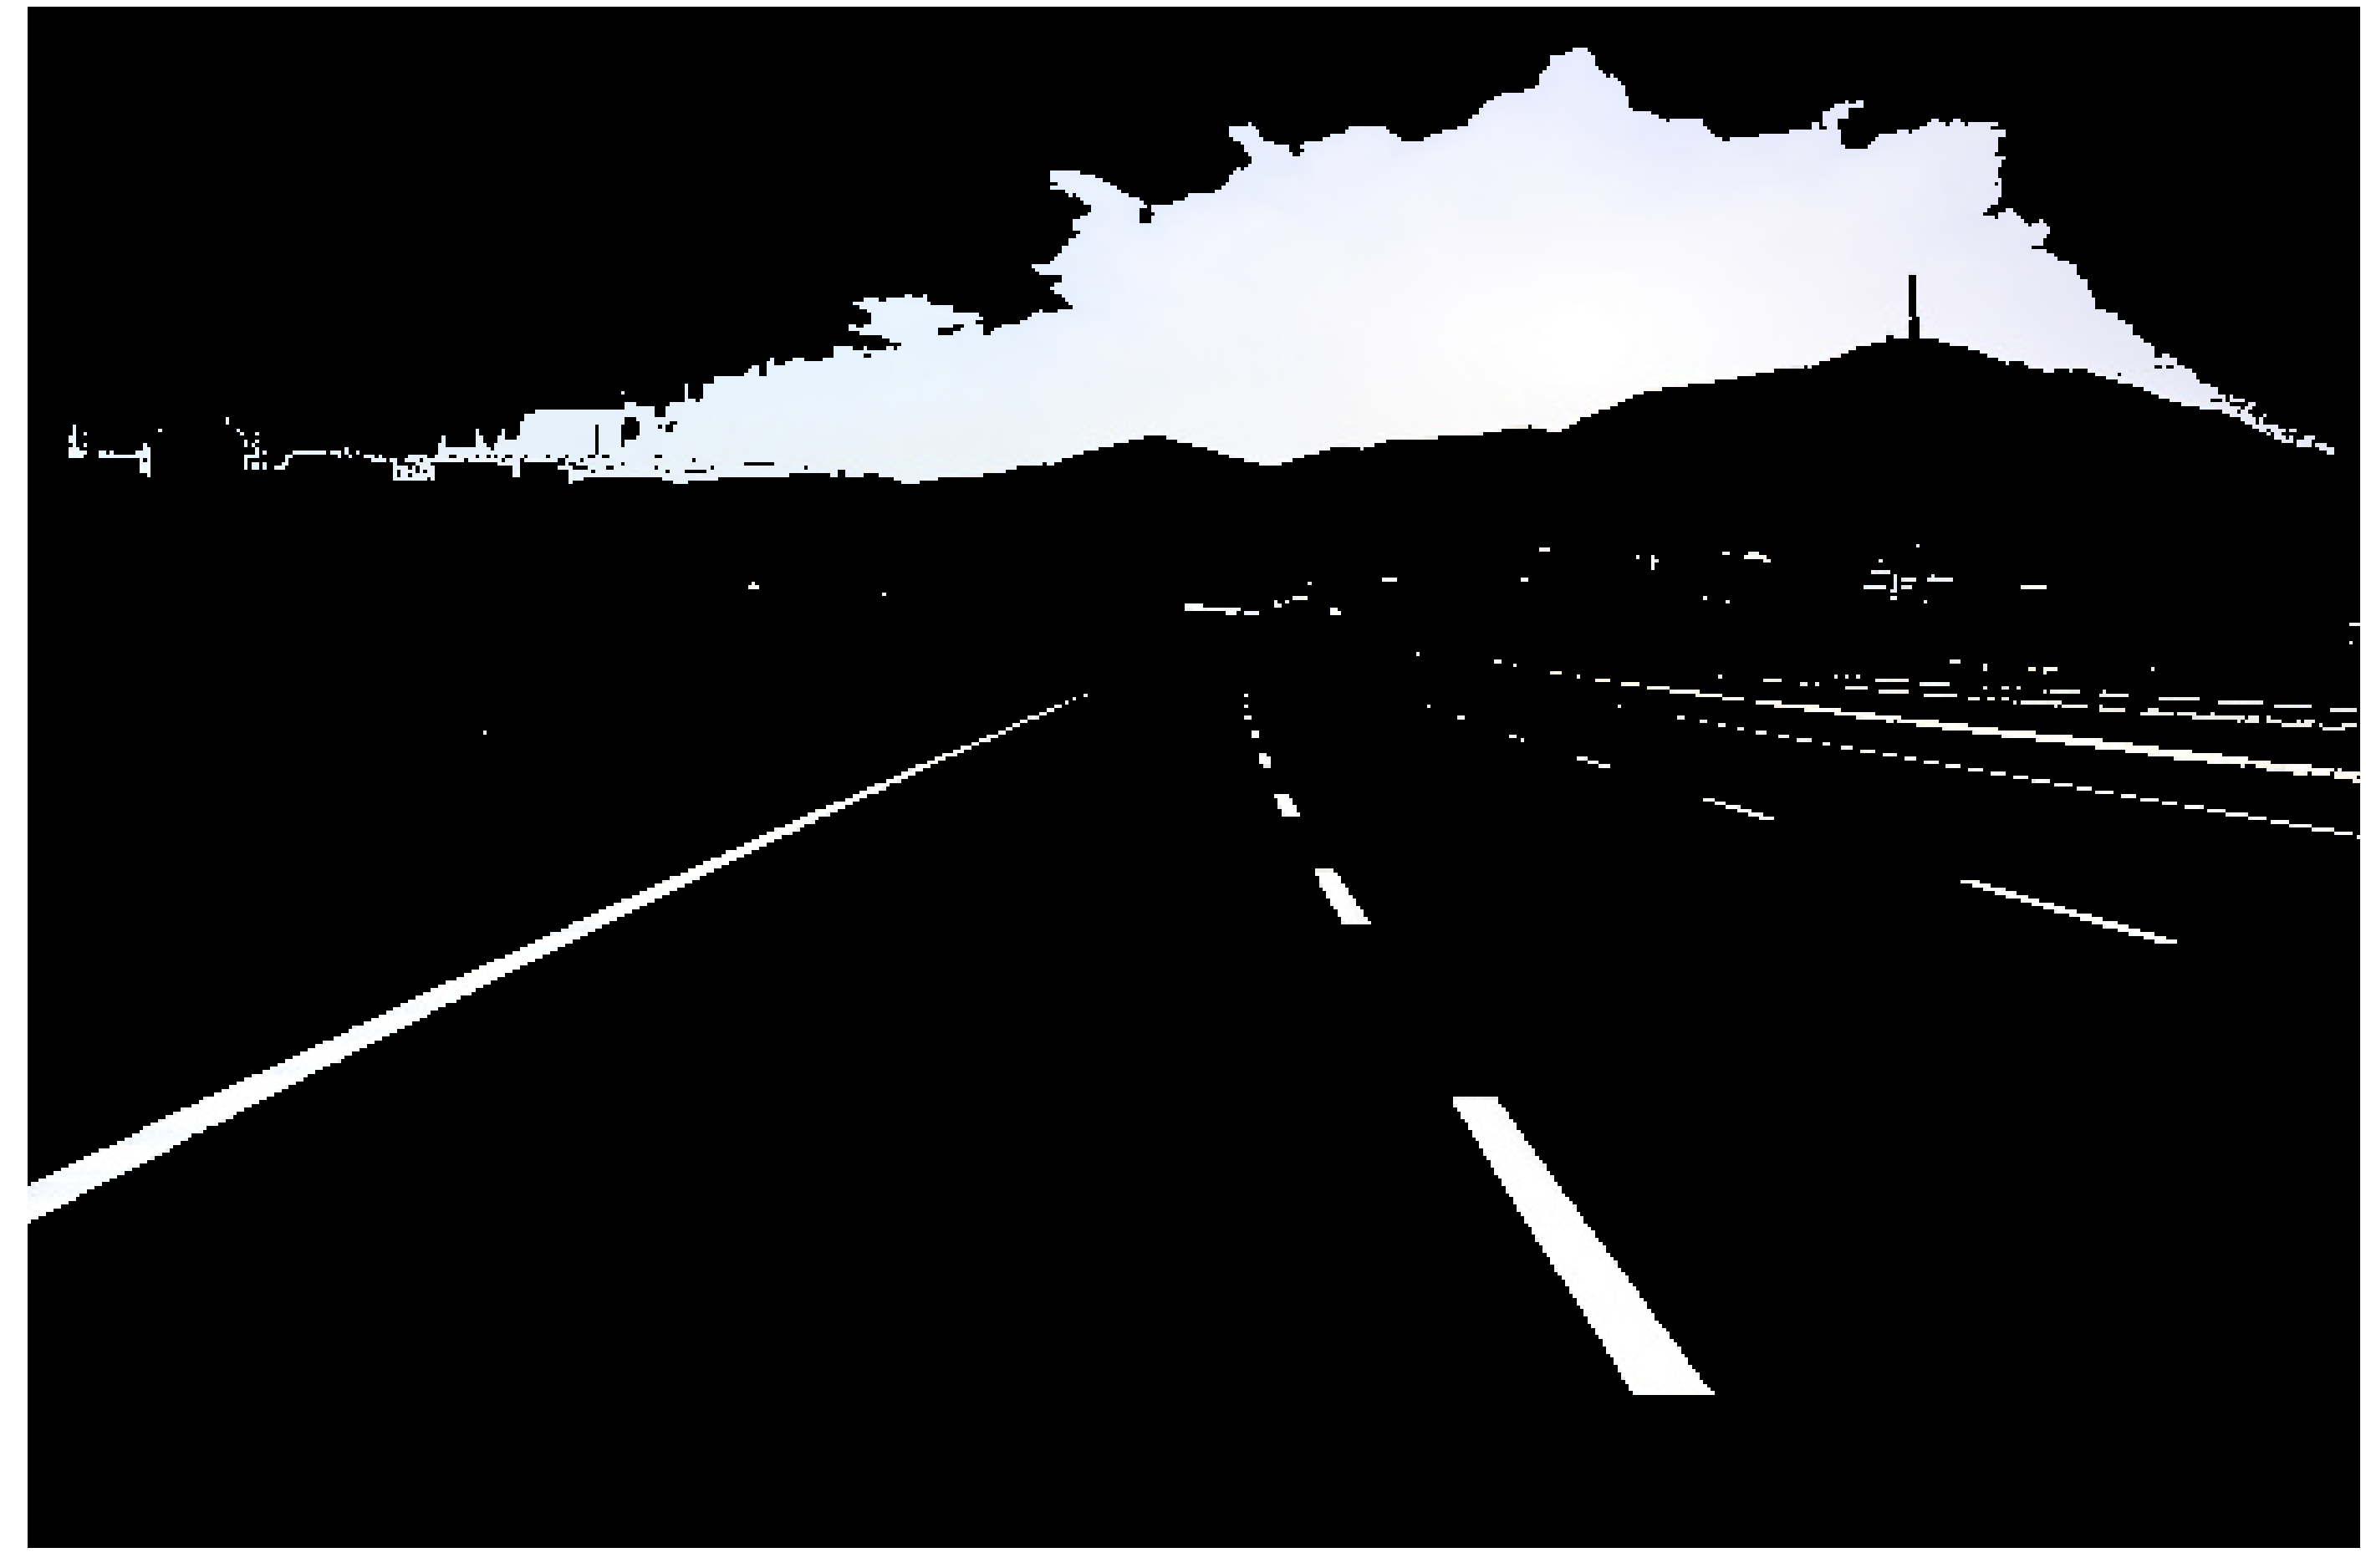

In [9]:
# Print da imagem             
show(color_select, color=False)